importing the libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NOW CALCULATE THE EUCLIDEAN DISTANCE AND FOR PREDICTION WE DEFINE PREDICT

In [41]:
class KNearestNeighbors:
    def __init__(self, k=3):
        self.k = k

    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, x_test):
        y_pred = []
        for test_sample in x_test:
            distances = []
            for train_sample, train_label in zip(self.x_train, self.y_train):
                distance = self.euclidean_distance(test_sample, train_sample)
                distances.append((distance, train_label))
            distances.sort(key=lambda x: x[0])
            k_nearest_labels = [label for _, label in distances[:self.k]]
            unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
            pred_label = unique_labels[np.argmax(counts)]
            y_pred.append(pred_label)
        return np.array(y_pred)

LOADING THE DATA SET BY PANDAS LIBRARY

In [42]:
data = pd.read_csv('/content/train_fsm.csv')
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


FOR THE DATA SET WE HAVE TO DO DATA PREPROCESSING, 
WE HAVE TO SELECT TWO COLUMNS FROM THE DATASET FOR ACCURACY AND VISUALIZATION,
AND BELOW ARE SOME STEPS FROM THE DATA PREPROCESSING

In [43]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
y = y.astype(str)
selected_columns = ['Fare', 'Age']
X_selected = X[selected_columns]

USING ONE-HOT ENCODING, IT IS APPLIED TO SELECTED USING DUMMIES FROM PANDAS WE USE IT FOR CHANGING CATEGORICAL VALUES INTO NUMERICAL VALUES

In [44]:
X_selected = pd.get_dummies(X_selected)
X_selected = X_selected.values
y = y.values

SPLITTING THE DATA SET INTO TRAIN AND TEST SETS BY TAKING RANDOM STATE

In [45]:
def train_test_split(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    test_size = int(len(X) * test_size)
    test_indices = shuffled_indices[:test_size]
    train_indices = shuffled_indices[test_size:]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2)

APPLYING KNN AND PREDICTION FOR TEST LABELS

In [46]:
knn = KNearestNeighbors(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

FOR ACCURACY WE COMPARE PREDICTED LABELS WITH ACTUAL LABELS

In [47]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6910112359550562


FOR VISUALIZATION WE TAKE TWO FEATURES AND BY THOSE TWO WE SCATTER PLOT THEM FOR BETTER REPRESENTATION

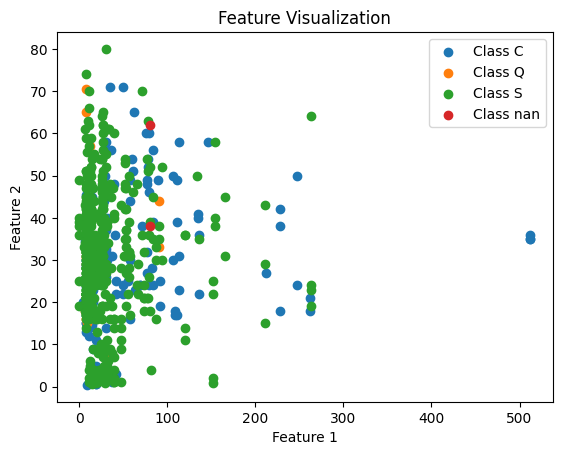

In [48]:
class_names = np.unique(y)
feature1, feature2 = X_selected[:, 0], X_selected[:, 1]

plt.figure()
plt.title("Feature Visualization")
for c in class_names:
    plt.scatter(feature1[y == c], feature2[y == c], label=f"Class {c}")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
